<img src="https://upload.wikimedia.org/wikipedia/it/1/10/Unifi_nuovo.svg" width="120px" heigth="120px" align="right">

# Laboratorio di Algoritmi e Strutture Dati

## *Confronto algoritmi Selection-Sort e Quick-Sort*

> **Francesca Sani** - Mat. 7025023

---
## Indice
* [Introduzione](#introduzione)
    * [Librerie utilizzate](#librerie)
* [Cenni teorici](#teoria)
    * [Problemi dell'ordinamento](#problema)
    * [Selcetion-Sort](#Selection-Sort)
        * [Complessità](#complessitàS)
        * [Correttezza](#correttezzaS)
        * [Stabilità](#stabilitàS)
        * [Codice](#codiceS)
    * [Quick-Sort](#Quick-Sort)
        * [Complessità](#complessitàQ)
        * [Correttezza](#correttezzaQ)
        * [Stabilità](#stabilitàQ)
        * [Codice](#codiceQ)
* [Descrizione dei Test](#descTest)
    * [Generazione dati per i Test](#genDataTest)
    * [Esecuzione dei Test](#esecTest)
    * [Generazione dei grafici di Test](#graficiTest)
    * [Generazione delle tabelle di Test](#tabelleTest)
---

## Introduzione <a id="introduzione">

Lo scopo di questo Notebook Jupyter è quello di confrontare le prestazioni di due algoritmi di ordinamento: **Selection-Sort** e **Quick-Sort**.

### Librerie utilizzate <a id="librerie">

Per svolgere i test sono stati utilizzati i seguenti moduli Python:
* <code>numpy</code> $ \rightarrow $ permette di generare array con dei valori casuali.
* <code>matplotlib</code> $ \rightarrow $ permette di generare grafici e tabelle, in modo da poter analizzare le prestazioni dei due algoritmi. <br>

Atraverso il blocco di codice sottostante verrano installati automaticamente.

In [1]:
!pip install numpy --user --quiet
!pip install matplotlib --user --quiet

---
## Cenni teorici <a id="teoria">

### Problema dell'ordinamento <a id="problema">
Data una sequenza di n numeri potremmo avere la necessità di volerla ordinare secondo determinati criteri, è possibile formalizzare il *problema dell'ordinamento* come segue: <br>
**Input** : una sequenza di *n* numeri $ A = <a_1, a_2, ..., a_n>$ <br>
**Output** : una permutazione $A' = <a'_1, a'_2, ..., a'_n>$ di $A$ tale che $a'_1 \leq a'_2 \leq ... \leq a'_n$.

Esistoni vari algoritmi di ordinameno che permettono di "risolvere" questo problema. La scleta di quale algoritmo utilizzare dipenderà dal contesto in cui dovrà operare, poiché differiscono tra loro per velocità di esecuzione, complessita computazionale.

---
### Selection-Sort <a id="Selection-Sort">
Il **Selection-Sort**, o ordinamento per selezione, è un algoritmo di ordinamento il quale seleziona l'elemento più piccolo da un array non ordinato ad ogni iterazione e posiziona tale elemento all'inizio dell'array non ordinato. Questo tipo di ordinamento è un ordinamento di tipo crescente.

Inizialmente, il primo elemento viene impostato come **minimo** e lo confronta con quello successivo, che se è minore diventa il minimo, altrimenti procede con il successivo, questo lo fa fino ad arrivare all'ultimo elemento. <br>
Dopo ogni iterazione il *minimo* individuato viene scambiato con il primo elemento da analizzare. <br>
Questo procedimento viene eseguito finché tutti gli elementi presenti nell'array non si trovano nella posizione corretta, ovvero finché non resta un solo elemento che sarà sicuramente maggiore rispetto a gli elementi di sinistra contenuti nell'array.

Esempio.

<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-0.png" width="400px" align="left">
<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-1.png" width="400px">

<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-2.png" width="400px" align="left" >
<img src="https://www.programiz.com/sites/tutorial2program/files/Selection-sort-3_1.png" width="400px">

---
<font color="#3F3F3F"> **Figura 1**: esempio di applicazione di Selection-Sort

### Complessità <a id="complessitàS">
La complessità di questo algoritmo è la solita in tutti i casi, poiché ad ogni passo devo trovare il minimo e metterlo nella posizione corretta. L'elemento minimo non viene individuato finché tutto l'array non è stato esplorato. <br> 
Quindi sia nel caso peggiore (array ordinato inversamente), sia nel caso migliore (array già ordinato), sia in quello medio (array in ordine casuale) la complessità è di $O(n^2)$.

| Caso peggiore | Caso migliore | Caso medio |
|:---:|:---:|:---:|
| $O(n^2)$ | $O(n^2)$ | $O(n^2)$ |

Questo algoritmo non è molto efficiente, ma è un'ottima soluzione quando si deve ordinare un quantitativo non troppo elevato di elementi.

### Correttezza <a id="correttezzaS">
L'algoritmo Selection-Sort è un algoritmo iterativo, pertanto è possibile dimostrare la sua **correttezza** attraverso un invariante di ciclo; è possibile affermare la correttezza di questo algoritmo, poiché qualsiasi input gli viene fornito termina sempre con l'output corretto.

### Stabilità <a id="stabilitàS">
Il Selection-Sort è un algoritmo **non stabile**, poiché chiavi che hanno lo stesso valore possono essere invertite e quindi non apparire nello stesso ordine di ingresso. 

### Codice <a id="codiceS">

In [2]:
# Implementazione dell'algoritmo Selection-Sort
def SelectionSort(A: list):
    n = len(A)

    for i in range(n):
        min_idx = i

        for j in range(i + 1, n):
            if A[j] < A[min_idx]:
                min_idx = j
        tmp = A[i]
        A[i] = A[min_idx]
        A[min_idx] = tmp

---
### Quick-Sort <a id="Quick-Sort">
Il **Quick-Sort** è un algoritmo basato sul paradigma *Divide-at-Impera*, che sceglie un elemento come pivot e partiziona l'array dato in base al pivot selezionato, posizionandolo nella sua posizione corretta. 

Per ordinare un array della forma $A[p ... r]$: <br>

**Divide**: Partizionare l'array $A[p ... r]$ in due sottoarray $A[p ... q-1]$ e $A[q+1 ... r]$ tali che ogni elemento in $A[p ... q-1]$ sia minore uguale a $A[q]$  e ogni elemento in $A[q+1 ... r]$ sia maggiore uguale a $A[q]$. <br>
**Impera**: Ordinare i due sottoarray attraverso chiamate ricorsive a QUICK-SORT. <br>
**Combina**: I sottoarray sono ordinati sul posto, l'intero array $A[p ... r]$ è ordinato.

Esempio.

<img src="https://www.programiz.com/sites/tutorial2program/files/quick-sort-working.png" width="650px" >

<img src="https://www.programiz.com/sites/tutorial2program/files/quick-sort-1.png" width="650px">

---
<font color="#3F3F3F"> **Figura 2**: esempio di applicazione di Quick-Sort

### Complessità <a id="complessitàQ">
La complessità di questo algoritmo si differenza tra caso peggiore e caso migliore e caso medio.<br>
    
* *Caso migliore*, ovvero quando il pivot viene scelto im modo tale che divide sempre l'array a metà e quindi l'algoritmo crea delle partizioni bilanciate, la sua complessità è di $O(n\  lg\  (n))$.<br>
* *Caso peggiore*, ovvero quando il pivot viene scelto sempre in modo tale che sia sempre o l'elemento più piccolo o l'elemento più grande, creando così delle partizioni totalmente sbilanciate, pertanto la sua complesità è di $O(n^2)$.<br>
* *Caso medio* la sua complessità è di $O(n\ lg\ (n))$.

| Caso peggiore | Caso migliore | Caso medio |
|:---:|:---:|:---:|
| $O(n^2)$ | $O(n\ lg\ (n))$ | $O(n\ lg\ (n))$ |

Questo algoritmo è efficiente se si riesce ad evitare il verificarsi del caso peggiore, per esempio scegliendo il pivot in modo casuale. Inoltre, è vantaggioso in caso di un quantitativo elevato di elementi da ordinare.

### Correttezza <a id="correttezzaQ">
Il Quick-Sort è un algoritmo che partiziona, per verificare la **correttezza** della partizione, essendo iterativa, è possibile farlo attraverso un invariate di ciclo. Inoltre, come per il Selection-Sort, è possibile affermare che tale algoritmo genera sempre l'output corretto per qualsiasi input dato.

### Stabilità <a id="stabilitàS">
Il Quick-Sort, come il Selection-Sort, è un algoritmo **non stabile**, poiché chiavi che hanno lo stesso valore possono essere invertite e quindi non apparire nello stesso ordine di ingresso.

### Codice <a id="codiceQ">

In [3]:
# Implementazione dell'algoritmo Partition per Quick-Sort
def Partition(A, p, r):
    pivot = A[r]
    i = p -1
    for j in range(p, r):
        if A[j] <= pivot:
            i = i + 1
            tmp= A[i]
            A[i] = A[j]
            A[j] = tmp

    tmp = A[i+1]
    A[i+1] = A[r]
    A[r] = tmp
    return i + 1

In [4]:
# Implementazione dell'algoritmo ricorsivo Quick-Sort con chiamate Ricorsive
def QuickSortRecursive(A, p, r):
    if p < r:
        q = Partition(A, p, r)
        QuickSortRecursive(A, p, q-1)
        QuickSortRecursive(A, q+1, r)

In [5]:
# Implementazione della prima chiamata di Quick-Sort
def QuickSort(A: list):
    r = len(A) - 1
    QuickSortRecursive(A, 0, r)

---
## Descrizione dei Test <a id="descTest">
Per poter testare le prestazioni dei due diversi algoritmi di ordinamento, sarà necerrario generare una lista di *n* valori e misurare i rispettivi tempi di esecuzione. <br>
    
Per eseguire e semplificare questi test vengono presi in considerazione soltanto valori numerici interi. <br>
Gli array che verranno generati, saranno tali da poter testare al meglio l'algoritmo Quick-Sort,  il quale ha una complessità diversa nei tre casi, a differenza del Selection-Sort che ha sempre una complessità di $O(n^2)$. <br>

I test di ordinamento verranno eseguiti su un insieme di *n* valori, con *n* che varia da 1 a 2000. <br>
Per ogni test, verranno eseguite più prove, generando input diversi, e verrà inoltre calcolato un valore medio per ciascun gruppo di prove effettuato.

### Generazione dati per i Test <a id="genDataTest">

Definiamo tre funzioni che permettono di generare array con *n* valori:
* La prima funzione, <code>sortedArray(n)</code>, genera array di *n* elementi ordinati in modo crescente;
* La seconda funzione, <code>reversedArray(n)</code>, genera array di *n* elementi ordinati in modo decrescente;
* La terza funzione, <code>randomArray(n)</code>, genera array di *n* valori casuali compresi tra 1 e un valore massimo (max).

In [6]:
import numpy as np

max = 120

def sortedArray(n):
    return list(range(n))

def reversedArray(n):
    return list(range(n-1, -1, -1))

def randomArray(n):
    return np.random.randint(0, max+1, n).tolist()

### Esecuzione dei Test <a id="esecTest">

Per eseguire i test è stato definito un numero totale di iterazioni, *n*. Ad ogni iterazione viene generato un array composto da **i** elementi, il quale sarà ordinato utilizzando i due agoritmi in esame. <br>

La misurazione dei tempi di esecuzione è stata fatta attraverso il modulo **timeit**, in particolare attraverso la funzione **timeit.timeit()**. L'ordinamento è stato ripetuto un numero di volte pari a *nrIterazioniTest*, in modo da avere una misurazione più adeguata, e in eguito è stata calcolata la media dei tempi ottenuti.

In [7]:
import timeit

n = 200
j = 300
nrIterazioniTest = 300

selcetionSortBest = []
quickSortBest = []

selcetionSortWorst = []
quickSortWorst = []

selcetionSortAverage = []
quickSortAverage = []

def measureTime(function, args):
    """ Ritorna il tempo di esecuzione medio (in millisecondi) della funzione data"""
    return timeit.timeit(stmt=lambda : function(args), number=nrIterazioniTest) / nrIterazioniTest * 1000

In [8]:
# Caso migliore
for i in range(1, n):
    arrayTestS = sortedArray(i)
    arrayTestQ = arrayTestS

    selcetionSortBest.append(measureTime(SelectionSort, arrayTestS))

    quickSortBest.append(measureTime(QuickSort, arrayTestQ))
    
print("Eseguito")

Eseguito


In [9]:
# Caso peggiore
for i in range(1, n):
    arrayTestS = reversedArray(i)
    arrayTestQ = arrayTestS

    selcetionSortWorst.append(measureTime(SelectionSort, arrayTestS))

    quickSortWorst.append(measureTime(QuickSort, arrayTestQ))

print("Eseguito")

Eseguito


In [10]:
# Caso medio
for i in range(1, n):
    arrayTestS = randomArray(i)
    arrayTestQ = arrayTestS

    selcetionSortAverage.append(measureTime(SelectionSort, arrayTestS))

    quickSortAverage.append(measureTime(QuickSort, arrayTestQ))
    
    
print("Eseguito")

Eseguito


### Generazione dei grafici di Test <a id="graficiTest">
    
Attraverso l'uso del modulo <code>matplotlib</code> sono stati generati i grafici sottostanti. <br>

I grafici fanno riferimento rispettivamente al *caso migliore* (array con valori ordinati in modo crescente), al *caso peggiore* (array con valori ordinati in modo decrescente) e al *caso medio* (array con valori causali).

In [11]:
import matplotlib.pyplot as plt

def tracePlots(left_data, right_data, plot_title: str = None):
    x = np.linspace(1, n, len(left_data))
    fig, (left, right) = plt.subplots(1, 2, figsize=(15, 5))

    #Selection-Sort
    left.plot(x, left_data, color="red")
    left.set_title("Selection-Sort")
    left.set_xlabel("Dimensioni della lista")
    left.set_ylabel("Tempo di esecuzione")

    # Quick-Sort
    right.plot(x, right_data, color="blue")
    right.set_title("Quick-Sort")
    right.set_xlabel("Dimensioni della lista")
    right.set_ylabel("Tempo di esecuzione")

    if plot_title:
        fig.suptitle(plot_title, fontsize=16)

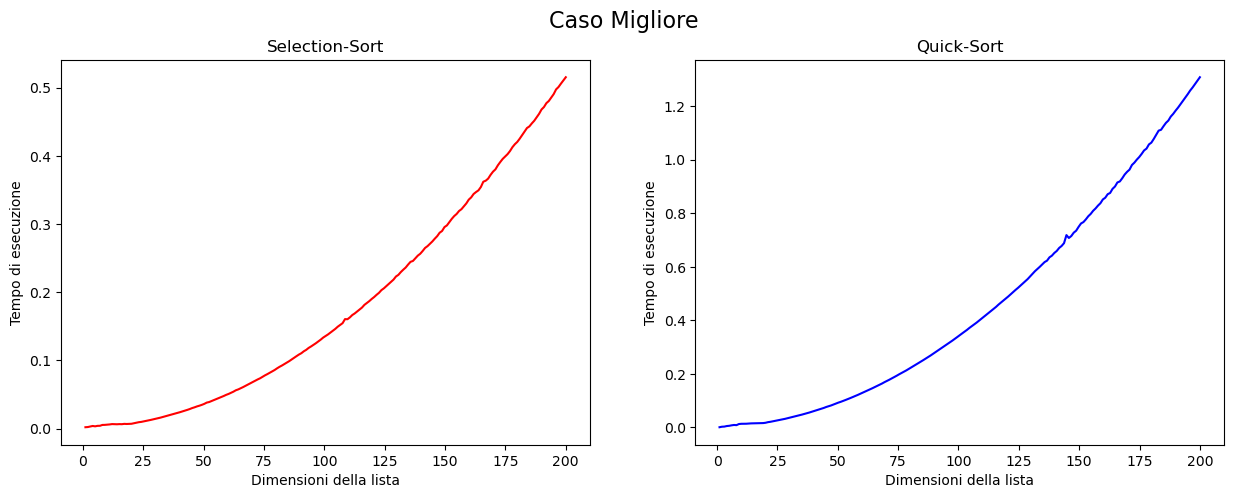

In [12]:
tracePlots(selcetionSortBest, quickSortBest, "Caso Migliore")

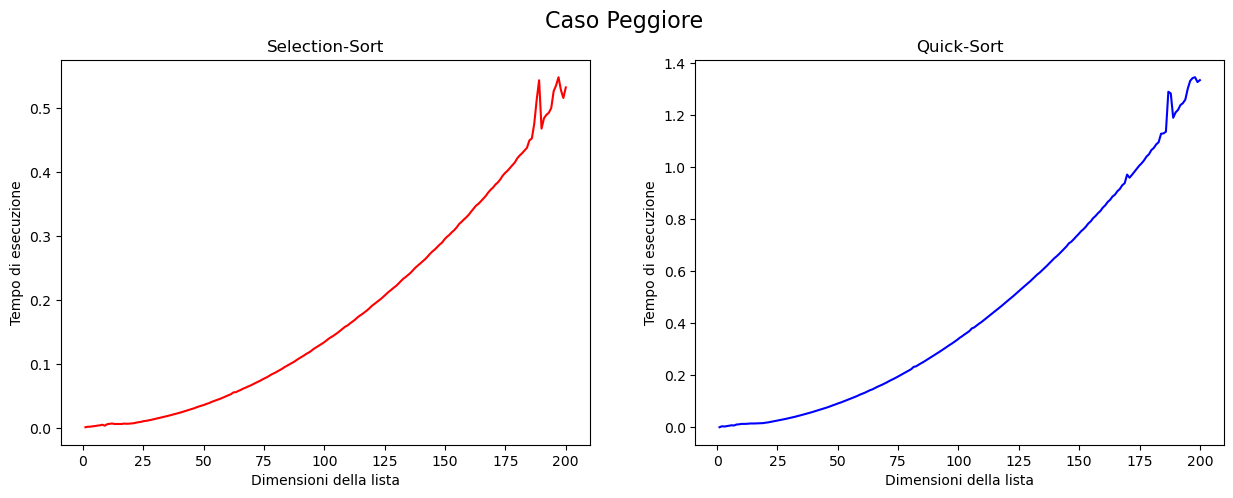

In [13]:
tracePlots(selcetionSortWorst, quickSortWorst, "Caso Peggiore")

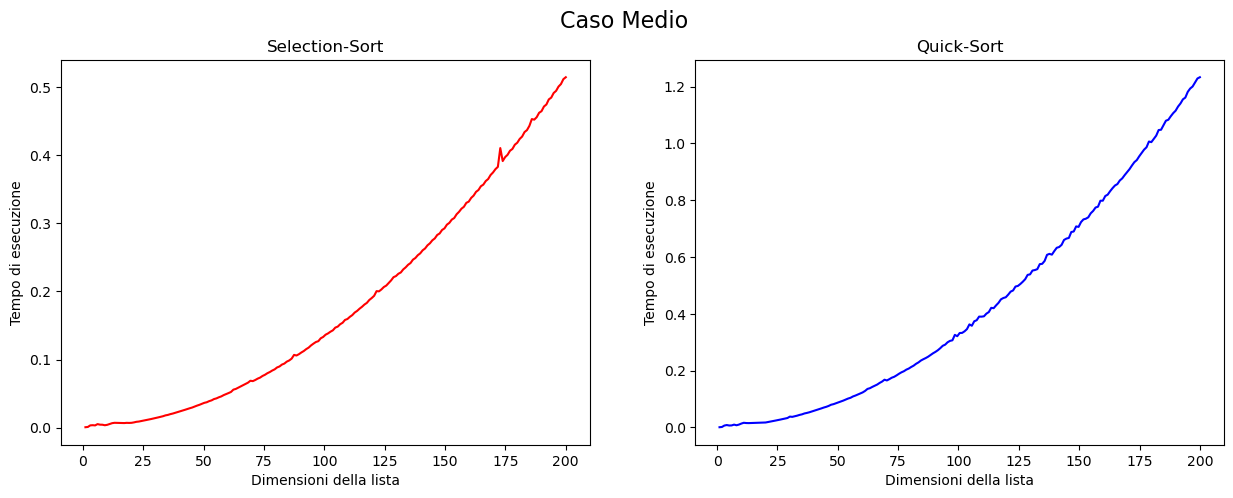

In [14]:
tracePlots(selcetionSortAverage, quickSortAverage, "Caso Medio")

### Generazione delle tabelle di Test <a id="tabelleTest">

Le tabelle sottostanti, che rappresentano i tempi di esecuzione degli algoritmi in esame, sono state generate attraverso l'uso del modulo <code>numpy</code>.